In [25]:
import numpy as np
import pandas as pd
from sklearn import *

In [26]:
df_o = pd.read_csv('forestfires.csv')
df = df_o.copy()

In [27]:
# reduce skew
area = df['area'].apply(lambda x: np.log(x + np.sqrt(x**2 + 1)))
area

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    2.561650
513    4.687572
514    3.107484
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float64

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

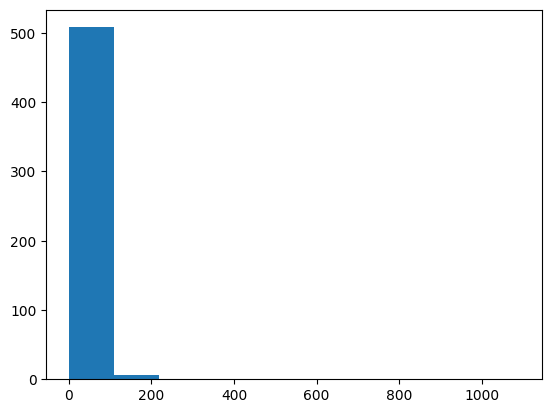

In [28]:
from matplotlib import pyplot as plt

plt.hist(df_o['area'])

(array([270.,  50.,  46.,  62.,  32.,  33.,  15.,   6.,   1.,   2.]),
 array([0.        , 0.76878507, 1.53757014, 2.30635521, 3.07514028,
        3.84392536, 4.61271043, 5.3814955 , 6.15028057, 6.91906564,
        7.68785071]),
 <BarContainer object of 10 artists>)

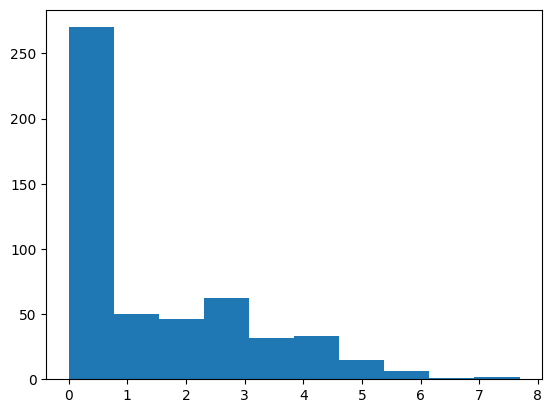

In [29]:
plt.hist(area)

In [30]:
parameters = df.drop('area', axis=1)
train_parameters, test_parameters, train_solutions, test_solutions = model_selection.train_test_split(parameters, area)

In [31]:
linreg = linear_model.LinearRegression()
linreg.fit(train_parameters, train_solutions)
print(linreg.score(train_parameters, train_solutions))

0.04122621483486355


In [32]:
train_solutions_log, train_parameters_log = train_solutions.copy().apply(lambda x: x > 0), train_parameters.copy().apply(lambda x: x > 0)

logreg = linear_model.LogisticRegression()
logreg.fit(train_parameters_log, train_solutions_log)
print(logreg.score(train_parameters_log, train_solutions_log))

0.5348837209302325
